<a href="https://colab.research.google.com/github/ztybot/MH3520_Mathematics_of_Deep_Learning/blob/main/02_problemset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 Problemset 

**Hint:** You may copy and adapt some code from the [TensorFlow 2 Quickstart for Beginners](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). 

**Instructions:** Fill in the missing code, which is marked by `# TODO`. If you can, run this notebook on a GPU. On Google Colab, you can do this by selecting Runtime > Change Runtime Type > Hardware Acceleration > GPU. Start by loading the necessary libraries as follows:



In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 2.4 Defining and plotting a simple multi-layer perceptron

Define a `tf.keras.model` to represent multi-layer perceptrons of the form
$$f(x)=\sum_{i=1}^{50} w_i \rho(a_i x+b_i),$$
where $x,w_i,a_i,b_i$ are real numbers, and $\rho(x)=\max\{0,x\}$.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 50)                100       
                                                                 
 layer2 (Dense)              (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


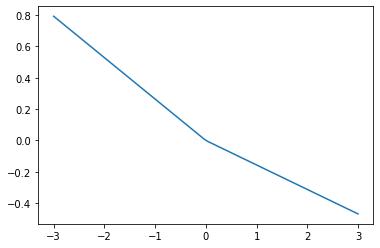

In [2]:
model = tf.keras.models.Sequential([
  # TODO add input and dense layers here
  tf.keras.layers.Input(shape=1),
  tf.keras.layers.Dense(50, activation='relu', name='layer1'),
  tf.keras.layers.Dense(1, name='layer2')
])

model.compile()
model.summary()
plt.plot(np.linspace(-3, 3, 100), model.predict(np.linspace(-3, 3, 100)))
plt.show()

You should see a piecewise linear function with a single kink at zero. This is not a coincidence: the bias of both layers has been initialized to zero. Here is how you can verify this: 

In [3]:
# bottom (input) layer
model.get_layer(index=0).weights

[<tf.Variable 'layer1/kernel:0' shape=(1, 50) dtype=float32, numpy=
 array([[-2.74671495e-01,  7.73594677e-02, -1.55580714e-01,
          3.02341133e-01, -1.47476867e-01,  2.11077362e-01,
          2.18531936e-01,  1.65201753e-01,  1.09390497e-01,
          2.95283228e-01, -2.34840021e-01,  1.63540274e-01,
         -2.20453173e-01,  3.38449806e-01, -1.23986855e-01,
         -1.06617689e-01, -1.00575089e-02,  7.31504261e-02,
          7.88106918e-02,  2.97164708e-01, -5.61430156e-02,
         -1.52985841e-01, -2.92405486e-02,  1.23432577e-01,
         -2.34905928e-01,  4.55495715e-02,  9.02672112e-02,
          1.79610044e-01,  1.56128049e-01,  1.84256047e-01,
         -3.15694481e-01,  2.06541806e-01, -3.05648685e-01,
         -1.10508144e-01, -2.36178458e-01,  7.20306337e-02,
          2.31174678e-01,  1.17968410e-01, -1.79072514e-01,
         -1.36756405e-01, -2.45467901e-01, -1.05669484e-01,
          7.74562359e-05,  5.58465123e-02, -2.13254690e-01,
         -8.87811780e-02, -2.106

In [4]:
# top (output) layer
model.get_layer(index=1).weights

[<tf.Variable 'layer2/kernel:0' shape=(50, 1) dtype=float32, numpy=
 array([[ 0.2948793 ],
        [ 0.3185785 ],
        [ 0.07185286],
        [ 0.20682475],
        [ 0.32391903],
        [-0.01110235],
        [ 0.07422146],
        [-0.02997598],
        [-0.20981702],
        [-0.2924964 ],
        [ 0.16100237],
        [-0.06771871],
        [ 0.27039865],
        [-0.29653725],
        [ 0.15129903],
        [ 0.312039  ],
        [-0.16887371],
        [ 0.260977  ],
        [ 0.14632553],
        [ 0.22482106],
        [ 0.27838138],
        [ 0.32377842],
        [-0.03593317],
        [ 0.05043533],
        [-0.2834617 ],
        [ 0.1305309 ],
        [ 0.05479977],
        [ 0.06840366],
        [-0.13953175],
        [-0.3053462 ],
        [ 0.27925834],
        [-0.3098982 ],
        [ 0.16814652],
        [ 0.09953949],
        [-0.3139178 ],
        [-0.1338521 ],
        [ 0.10832945],
        [ 0.11868477],
        [-0.33187518],
        [-0.10199542],
        [ 0.

## 2.5 Random initialization of network coefficients

By default, the kernel coefficients $w_i$ and $a_i$ are initialized at random, whereas the bias coefficients $b_i$ are set to zero. To change this, set  `bias_initializer=tf.keras.initializers.RandomNormal(mean=0., stddev=1.)` when constructing the layers; see [here](https://keras.io/api/layers/initializers/#randomnormal-class) for instructions.

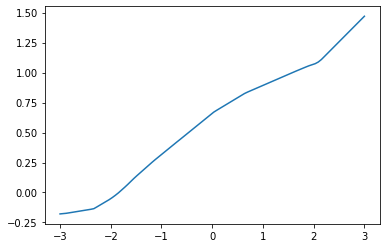

In [6]:
model = tf.keras.models.Sequential([
  # TODO add layers with random bias here
  tf.keras.layers.Input(shape=1),
  tf.keras.layers.Dense(50, activation="relu", bias_initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.), name="layer1"),
  tf.keras.layers.Dense(1, name='layer2')
])

model.compile()

plt.plot(np.linspace(-3, 3, 100), model.predict(np.linspace(-3, 3, 100)))
plt.show()

Execute the above cell several times. You should now see a piecewise linear function, which changes each time you run the code. The function will have a lot of kinks (how many?) and may look quite smooth for this reason.

## 2.6 Learning a sine function

The goal here is to learn the sine function.

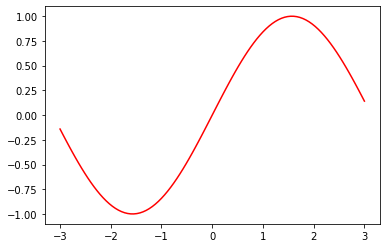

In [7]:
plt.plot(np.linspace(-3, 3, 100), np.sin(np.linspace(-3, 3, 100)), 'r')
plt.show()

The learning algorithm gets access to the ground truth (i.e., the sine function) only via noisy random samples. Specifically, it will be fed $N=10^3$ random samples $(x_i,y_i)$, where $x_i$ is uniformly distributed on the interval $[-3,3]$, and where $y_i=\sin(x_i)+\epsilon_i$ for some normally distributed $\epsilon_i$ with mean zero and standard deviation $1/10$. 

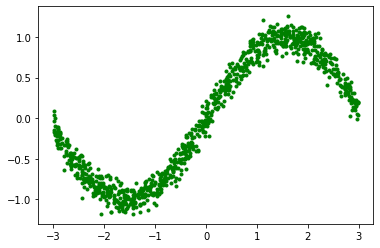

In [8]:
N = 1000
x_train = np.random.uniform(low=-3, high=3, size=N)
y_train = np.sin(x_train)+np.random.normal(loc=0.0, scale=0.1, size=N)
plt.plot(x_train, y_train, '.g')

We are now ready to train the model. To this aim, `compile` the model as you did before, but specify `tf.keras.optimizers.Adam()` as optimizer and `tf.keras.losses.MeanSquaredError()` as loss function. Then, `fit` the model using 100 epochs. The tutorial [TensorFlow 2 Quickstart for Beginners](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb) explains how to do this. As an aside, to suppress the lengthy output of the `fit` command, you can set `verbose=0`.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 50)                100       
                                                                 
 layer2 (Dense)              (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


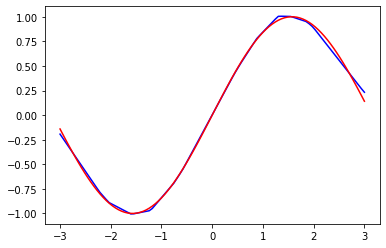

In [19]:
# TODO compile and then fit the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=1),
  tf.keras.layers.Dense(50, activation="relu", bias_initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.), name="layer1"),
  tf.keras.layers.Dense(1, name='layer2')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.MeanSquaredError())
model.fit(x_train, y_train, epochs=100, verbose = 0)

model.summary()
plt.plot(np.linspace(-3, 3, 100), model.predict(np.linspace(-3, 3, 100)), 'b')
plt.plot(np.linspace(-3, 3, 100), np.sin(np.linspace(-3, 3, 100)), 'r')
plt.show()

## 2.7 Freezing the coefficients of the lower layer

To a large extent, deep learning is linear regression with random features. To see this, freeze the coefficients of the bottom layer during training as explained [here](https://keras.io/api/layers/base_layer/#trainable-property). As the model is linear in the top-layer coefficients $w_i$, training then reduces to a linear regression problem. Of course, the regression will work well only if the random features are well-chosen. In the present setting, this means that you **must** randomly initialize the bias as in problem 2.4. (Feel free to try.)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 50)                100       
                                                                 
 layer2 (Dense)              (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 51
Non-trainable params: 100
_________________________________________________________________


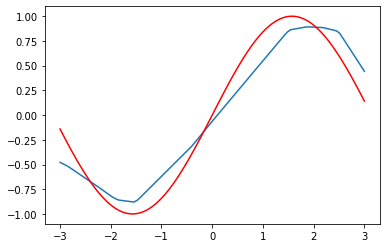

In [30]:
model = tf.keras.models.Sequential([
  # TODO add layers with random bias as in problem 2.5 
  tf.keras.layers.Input(shape=1),
  tf.keras.layers.Dense(50, activation="relu", bias_initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.), name="layer1"),
  tf.keras.layers.Dense(1, name='layer2')
])

# set trainable = False for the coefficients of the bottom layer
model.layers[0].trainable = False
model.layers[1].trainable = True

# train the model as you did in problem 2.6
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.MeanSquaredError())
model.fit(x_train, y_train, epochs=100, verbose = 0)

model.summary()

plt.plot(np.linspace(-3, 3, 100), model.predict(np.linspace(-3, 3, 100)))
plt.plot(np.linspace(-3, 3, 100), np.sin(np.linspace(-3, 3, 100)), 'r')
plt.show()